# Conflict in Brazil
Jessica Ertel

## Preliminary Wrangling

- What do you notice about each visualization?
- What questions do you have about the data?
- What relationships do you notice?
- What do you think is the main takeaway from the slide deck?
- Is there anything that you don’t understand from the plots?

- Do events exhibit any seasonality?
try a facetgrid to look at the number of fatalities per event or actor

Interaction codes:
All actors fall into 1 of 8 categories:
- Government or mutinous force = 1
- Rebel force =2
- Political militia= 3
- Ethnic militia = 4
- Rioters= 5
- Protesters = 6
- Civilians = 7
- Outside/external force (e.g. UN) =8

In [179]:
# import standard data manipulation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [105]:
# import the data and check shape
data = pd.read_csv('conflict_data_bra.csv')
data.shape

(14223, 31)

In [106]:
# drop the first row, which contains NaNs and title explanations
data.drop(index=0, inplace=True)
data.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
1,7077135.0,76.0,BRA14213,14213.0,2020-05-02,2020,1.0,Battles,Armed clash,Unidentified Gang and/or Police Militia,...,Governador Valadares,-18.8564,-41.9547,1.0,G1,National,"On 2nd May 2020, in Governador Valadares, Mina...",0,1.588632e+09,BRA
2,7077139.0,76.0,BRA14217,14217.0,2020-05-02,2020,1.0,Strategic developments,Looting/property destruction,Police Forces of Brazil (2019-) Federal Police,...,Montes Claros,-16.7287,-43.8641,1.0,G1,National,"On 2nd May 2020, in Montes Claros, Minas Gerai...",0,1.588632e+09,BRA
3,7077140.0,76.0,BRA14218,14218.0,2020-05-02,2020,1.0,Violence against civilians,Attack,Unidentified Gang and/or Police Militia,...,Mossoro,-5.1842,-37.3495,1.0,G1,National,"On 2nd May 2020, in Mossoro, Rio Grande do Nor...",1,1.588632e+09,BRA
4,7077146.0,76.0,BRA14224,14224.0,2020-05-02,2020,1.0,Riots,Violent demonstration,Rioters (Brazil),...,Vila Velha,-20.3467,-40.3019,1.0,G1,National,"On 2nd May 2020, in Vila Velha, Espirito Santo...",0,1.588632e+09,BRA
5,7077152.0,76.0,BRA14214,14214.0,2020-05-02,2020,1.0,Protests,Peaceful protest,Protesters (Brazil),...,Lauro de Freitas,-12.8944,-38.3272,1.0,G1,National,"On 2nd May 2020, in Lauro de Freitas, Bahia, p...",0,1.588632e+09,BRA


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14222 entries, 1 to 14222
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           14222 non-null  float64
 1   iso               14222 non-null  float64
 2   event_id_cnty     14222 non-null  object 
 3   event_id_no_cnty  14222 non-null  float64
 4   event_date        14222 non-null  object 
 5   year              14222 non-null  object 
 6   time_precision    14222 non-null  float64
 7   event_type        14222 non-null  object 
 8   sub_event_type    14222 non-null  object 
 9   actor1            14222 non-null  object 
 10  assoc_actor_1     3199 non-null   object 
 11  inter1            14222 non-null  float64
 12  actor2            9696 non-null   object 
 13  assoc_actor_2     927 non-null    object 
 14  inter2            14222 non-null  float64
 15  interaction       14222 non-null  float64
 16  region            14222 non-null  object

In [108]:
# drop columns that contain duplicate information 
# Region, country, iso and iso3 are all the same 
# admin3 is all null values
# year column not needed since we have date

data.drop(columns=['event_id_cnty', 
                   'event_id_no_cnty', 
                   'region', 
                   'country', 
                   'iso3', 
                   'iso',
                   'admin3',
                   'year'], inplace=True)

In [109]:
# update column names for clarity
data.rename(columns={'admin1':'state',
                     'admin2':'municipality'}, inplace=True)

In [110]:
(data['municipality'] != data['location']).sum()

2363

In [111]:
# fatalities column should be an integer
data['fatalities'] = data['fatalities'].astype(int)

In [112]:
# event data should be a datetime object
data['event_date'] = pd.to_datetime(data['event_date'], format='%Y-%m-%d')

In [207]:
# latitude and longitude should be floats
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14222 entries, 1 to 14222
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_id         14222 non-null  float64       
 1   event_date      14222 non-null  datetime64[ns]
 2   time_precision  14222 non-null  float64       
 3   event_type      14222 non-null  object        
 4   sub_event_type  14222 non-null  object        
 5   actor1          14222 non-null  object        
 6   assoc_actor_1   3199 non-null   object        
 7   inter1          14222 non-null  float64       
 8   actor2          9696 non-null   object        
 9   assoc_actor_2   927 non-null    object        
 10  inter2          14222 non-null  float64       
 11  interaction     14222 non-null  float64       
 12  state           14222 non-null  object        
 13  municipality    14222 non-null  object        
 14  location        14222 non-null  object        
 15  la

In [114]:
data.columns

Index(['data_id', 'event_date', 'time_precision', 'event_type',
       'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1', 'actor2',
       'assoc_actor_2', 'inter2', 'interaction', 'state', 'municipality',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp'],
      dtype='object')

In [186]:
# What is the total sum of fatalities?
data['fatalities'].sum()

6609

In [116]:
data.to_csv('conflict_data_bra_clean.csv')

### What is the structure of your dataset?

> The dataset has 14,222 records with 23 features. Most of the features are categorical and several are ordinal.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest will be the `fatalities`, `location` and `event_type` features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features such as `event_date` or `timestamp`, `actor1`, and `sub_event_type` will support my investigation into the nature and location of conflict events in Brazil.

In [117]:
data.head()

,data_id,event_date,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,...,municipality,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
1,7077135.0,2020-05-02,1.0,Battles,Armed clash,Unidentified Gang and/or Police Militia,NaN,3.0,Unidentified Gang (Brazil),NaN,...,Governador Valadares,Governador Valadares,-18.8564,-41.9547,1.0,G1,National,"On 2nd May 2020, in Governador Valadares, Mina...",0,1.588632e+09
2,7077139.0,2020-05-02,1.0,Strategic developments,Looting/property destruction,Police Forces of Brazil (2019-) Federal Police,NaN,1.0,Unidentified Gang (Brazil),NaN,...,Montes Claros,Montes Claros,-16.7287,-43.8641,1.0,G1,National,"On 2nd May 2020, in Montes Claros, Minas Gerai...",0,1.588632e+09
3,7077140.0,2020-05-02,1.0,Violence against civilians,Attack,Unidentified Gang and/or Police Militia,NaN,3.0,Civilians (Brazil),NaN,...,Mossoro,Mossoro,-5.1842,-37.3495,1.0,G1,National,"On 2nd May 2020, in Mossoro, Rio Grande do Nor...",1,1.588632e+09
4,7077146.0,2020-05-02,1.0,Riots,Violent demonstration,Rioters (Brazil),NaN,5.0,NaN,NaN,...,Vila Velha,Vila Velha,-20.3467,-40.3019,1.0,G1,National,"On 2nd May 2020, in Vila Velha, Espirito Santo...",0,1.588632e+09
5,7077152.0,2020-05-02,1.0,Protests,Peaceful protest,Protesters (Brazil),NaN,6.0,NaN,NaN,...,Lauro de Freitas,Lauro de Freitas,-12.8944,-38.3272,1.0,G1,National,"On 2nd May 2020, in Lauro de Freitas, Bahia, p...",0,1.588632e+09


## Univariate Exploration

### Fatalities

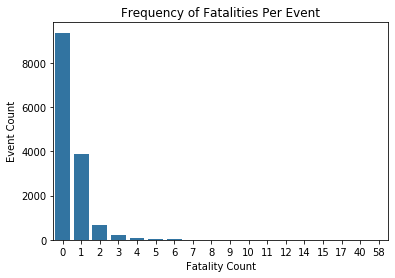

In [118]:
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(data['fatalities'], color=base_color, ax=ax)
ax.set_title("Frequency of Fatalities Per Event")
ax.set_xlabel('Fatality Count')
ax.set_ylabel('Event Count');

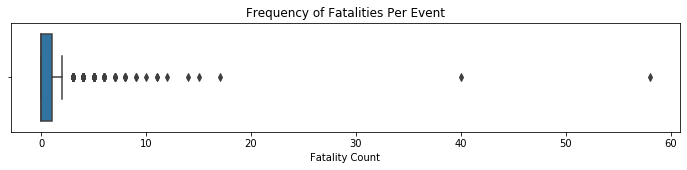

In [119]:
fig, ax = plt.subplots(figsize=(12,2))

sns.boxplot(x=data['fatalities'], ax=ax)
ax.set_title("Frequency of Fatalities Per Event")
ax.set_xlabel('Fatality Count')
ax.tick_params(labelsize=10);

First, I use a bar chart to look at the frequency of fatality counts across the dataset. There are clearly a high number of events that involved no fatalities. However, from the first bar chart it's not entirely clear how frequently higher number of fatalities occured. A boxplot allows me to better understand the fatality count for some of the outliers in the dataset. There are approximately 7 events where the fatality count was over 10 people. Next steps of investigation might look at fatalities in the context of event type to understand if certain types of conflicts are more deadly.

In [120]:
# Check high fatality events
data[(data['fatalities'] > 8)][['event_date','event_type', 'sub_event_type', 'actor1', 'state', 'municipality', 'fatalities']]

,event_date,event_type,sub_event_type,actor1,state,municipality,fatalities
4227,2019-12-01,Battles,Armed clash,Military Forces of Brazil (2019-) Military Police,Sao Paulo,Sao Paulo,10
5107,2019-10-30,Battles,Armed clash,Military Forces of Brazil (2019-) Military Police,Amazonas,Manaus,17
6583,2019-09-02,Battles,Armed clash,Unidentified Gang (Brazil),Alagoas,Girau do Ponciano,9
7550,2019-07-29,Battles,Armed clash,CCA: Class A Command,Para,Altamira,58
8072,2019-07-05,Violence against civilians,Attack,Unidentified Gang and/or Police Militia,Rio de Janeiro,Itaborai,12
8102,2019-07-02,Battles,Armed clash,Military Forces of Brazil (2019-) Military Police,Paraiba,Barra de Sao Miguel,9
9493,2019-05-27,Battles,Armed clash,Pure FDN: Pure Family of the North,Amazonas,Manaus,40
9605,2019-05-26,Battles,Armed clash,Pure FDN: Pure Family of the North,Amazonas,Manaus,15
9885,2019-05-19,Violence against civilians,Attack,Unidentified Armed Group (Brazil),Para,Belem,11
9886,2019-05-19,Violence against civilians,Attack,Military Forces of Brazil (2019-) Military Police,Para,Belem,11


### Location

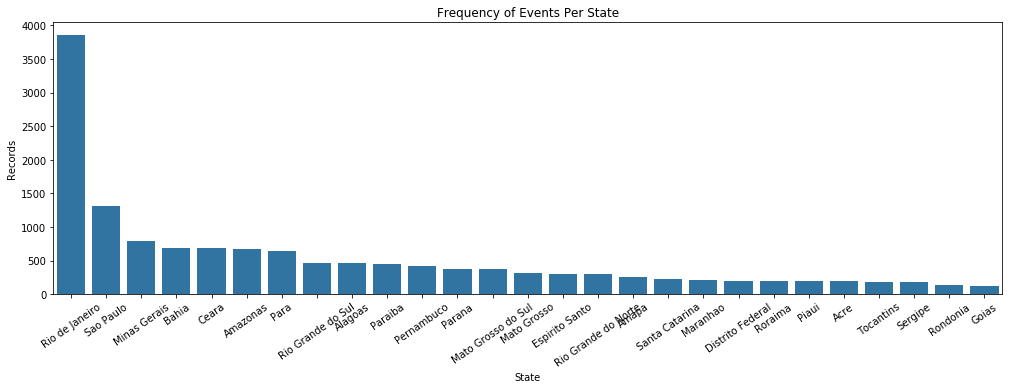

In [121]:
fig, ax = plt.subplots(figsize=(17,5))

sns.countplot(data['state'], color=base_color, ax=ax, order=data['state'].value_counts().index)
ax.set_title('Frequency of Events Per State')
ax.set_xlabel('State')
ax.set_ylabel('Records')
plt.xticks(rotation=35);

This bar chart illustrates the frequency of events per state in Brazil. We see that the highest number of records in the dataset are coming from three bordering states: Rio de Janiero, Sāo Paulo (not counting the Federal District) and Minas Gerais. To have a more nuanced understanding of how conflict manifests itself in different parts of Brazil, next steps would look at the number of fatalities or specific event types per state. Rio de Janeiro may have the highest frequency of events, but are they actually violent or just peaceful protests? Does frequency correlate to a higher number of fatalities?

### Event Type

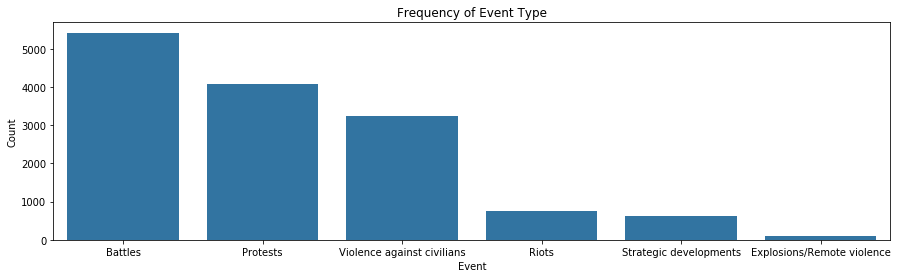

In [122]:
fig, ax = plt.subplots(figsize=[15,4])

sns.countplot(data['event_type'], color=base_color, ax=ax, order=data['event_type'].value_counts().index)
ax.set_title('Frequency of Event Type')
ax.set_xlabel('Event')
ax.set_ylabel('Count');

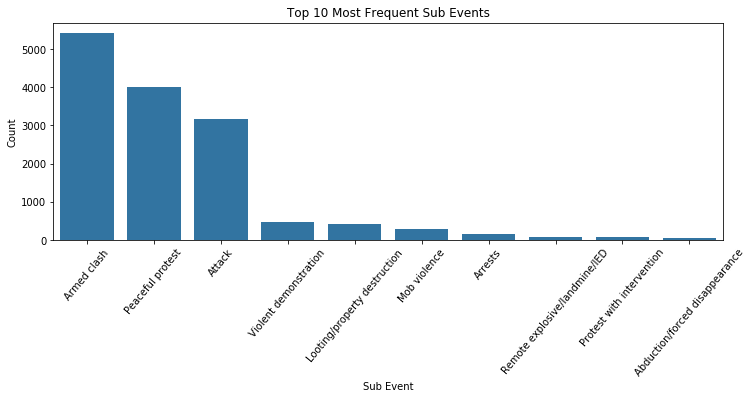

In [123]:
fig, ax = plt.subplots(figsize=[12,4])

sns.countplot(data['sub_event_type'], color=base_color, ax=ax, order=data['sub_event_type'].value_counts()[:10].index)
ax.set_title('Top 10 Most Frequent Sub Events')
ax.set_xlabel('Sub Event')
ax.set_ylabel('Count')
plt.xticks(rotation=50);

I also use basic bar charts to understand the types of events and their frequency. It appears that battles and protests are the most common event type in this dataset. Within these event types, the conflicts are categorized into sub event types - for readability purposes I only display the first 10. Next steps of the investigation will look at fatality counts in the context of each event.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the data I'm working with is qualitative and fortunately I did not need to perform any scale transformations. With respect to the main feature of interest (fatalities), I was pleased to see that most of the conflict events in this dataset did not see a high number of deaths. However, there are several outliers of events with high fatality counts, which warrant further investigation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In order to accurately utilize some of these features in my visuals, I needed to update their data types. I converted the fatalities data type to an integer and the event date to a pandas datetime object. I also needed to update the column names for some of the location data, in order to make it clearer. Finally, I dropped several columns that contained the same data in each row (ex: region). This likely happened because the data was extracted from a larger database of information.

## Bivariate Exploration

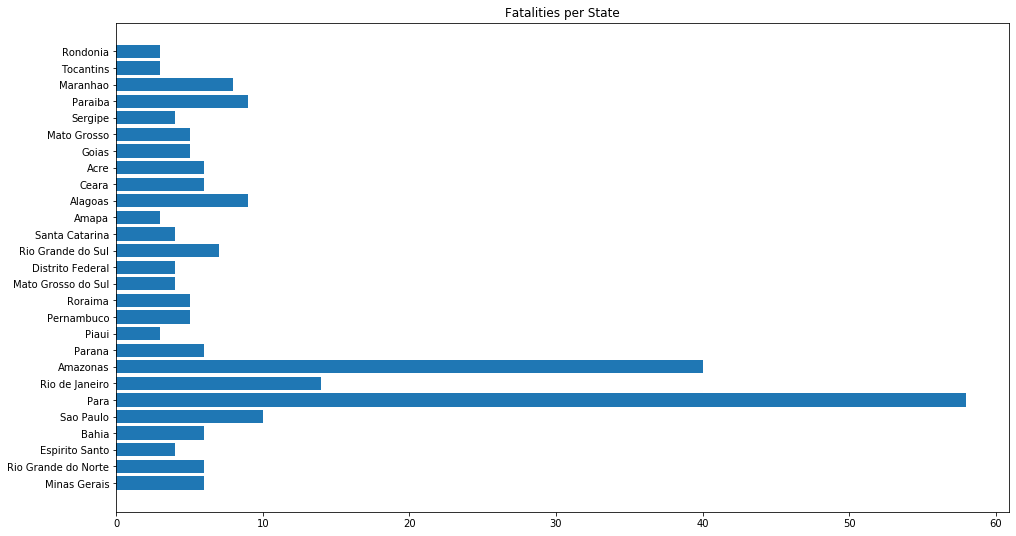

In [103]:
# Investigate fatalities per state

plt.figure(figsize=[16,9])

base_color = sns.color_palette()[0]
plt.barh(data['state'], data['fatalities'], color=base_color)
plt.title('Fatalities per State');

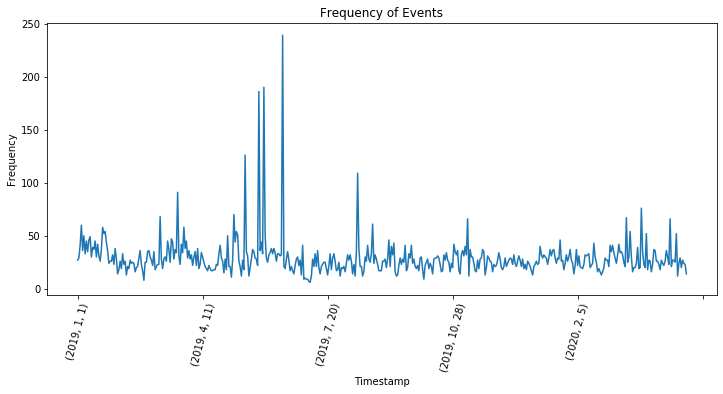

In [183]:
# Did more events take place at a certain time of year?

plt.figure(figsize=(12,5))

timing = data['event_date'].groupby(([data['event_date'].dt.year,
                                      data['event_date'].dt.month,
                                      data['event_date'].dt.day]))

ax = timing.count().plot(kind="line", rot=75)
ax.set_xlabel("Timestamp")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Events")
ax.tick_params(labelsize=10);

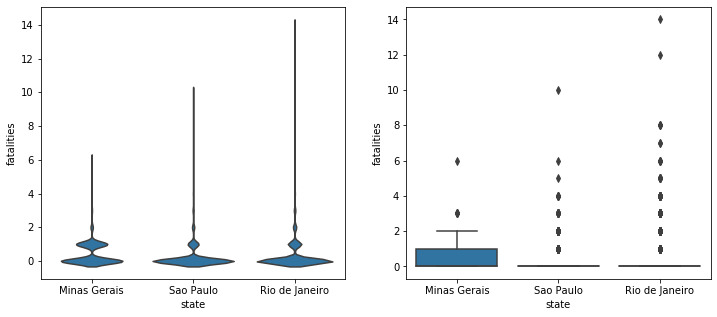

In [68]:
# Create a df to examine the high freq states
high_freq = data[(data['state']=='Rio de Janeiro') | (data['state']=='Sao Paulo') | (data['state']=='Minas Gerais')]

# Look at fatality distributions per high frequency states
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
sns.violinplot(data=high_freq, x='state', y='fatalities', color=base_color, inner=None)

plt.subplot(1, 2, 2)
sns.boxplot(data=high_freq, x='state', y='fatalities', color=base_color);

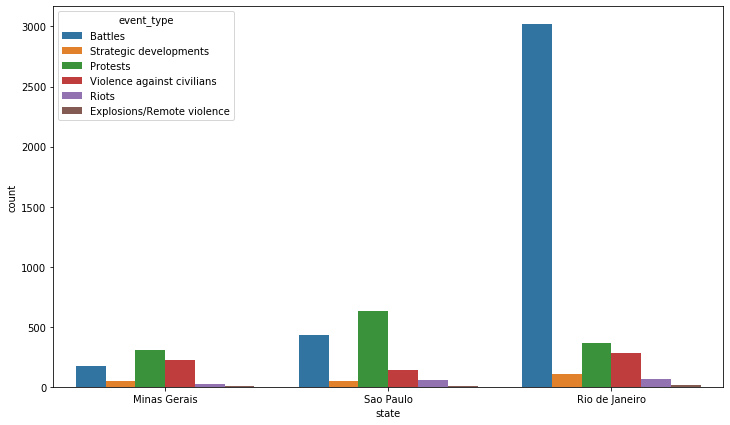

In [84]:
# What kinds of events are taking place in these states?
plt.figure(figsize=[12,7])
sns.countplot(data=high_freq, x='state', hue='event_type');

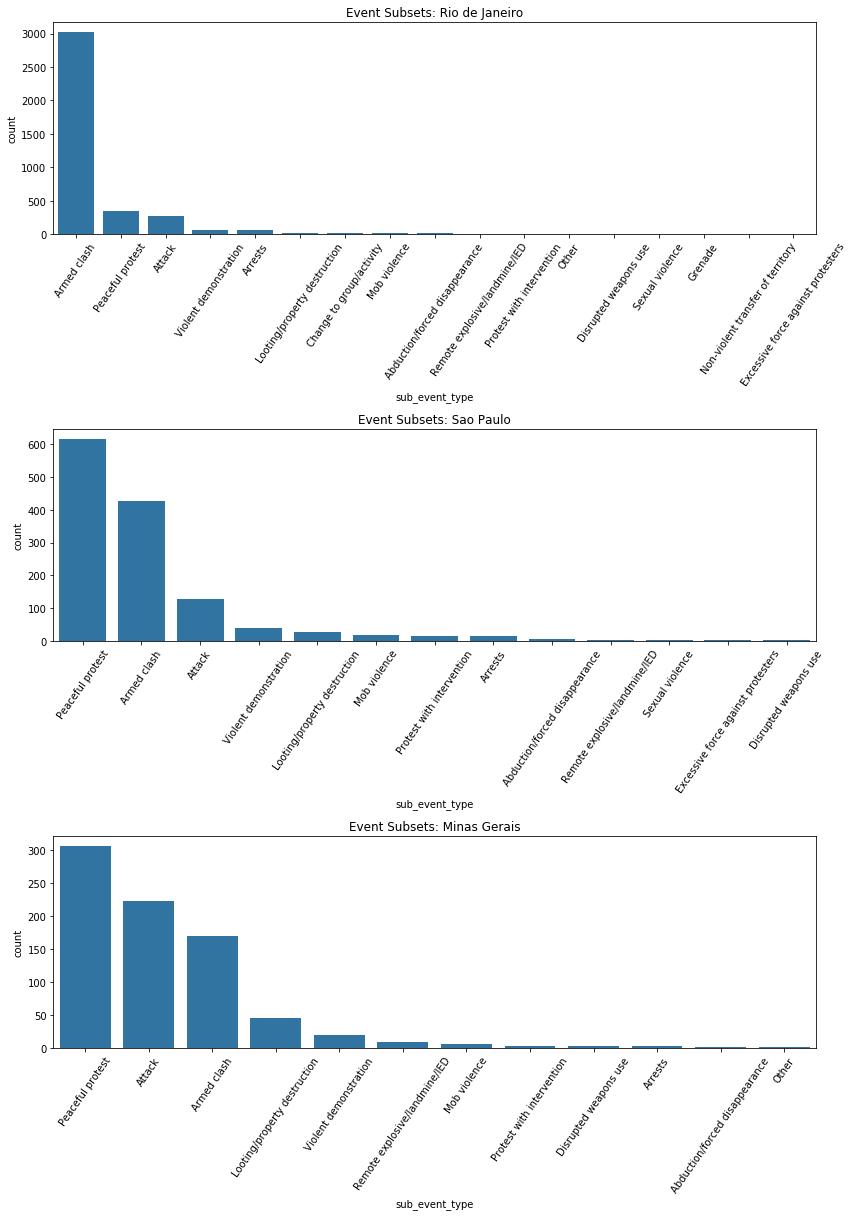

In [156]:
# Which sub events are most common in these states
plt.figure(figsize = [12, 17])

plt.subplot(3, 1, 1)
sns.countplot(data=high_freq[high_freq['state']=='Rio de Janeiro'], 
              x='sub_event_type', 
              color=base_color,
              order=high_freq[high_freq['state']=='Rio de Janeiro']['sub_event_type'].value_counts().index)
plt.title('Event Subsets: Rio de Janeiro')
plt.xticks(rotation=55)

plt.subplot(3, 1, 2)
sns.countplot(data=high_freq[high_freq['state']=='Sao Paulo'], 
              x='sub_event_type', 
              color=base_color,
              order=high_freq[high_freq['state']=='Sao Paulo']['sub_event_type'].value_counts().index)
plt.title('Event Subsets: Sao Paulo')
plt.xticks(rotation=55)

plt.subplot(3, 1, 3)
sns.countplot(data=high_freq[high_freq['state']=='Minas Gerais'], 
              x='sub_event_type', 
              color=base_color,
              order=high_freq[high_freq['state']=='Minas Gerais']['sub_event_type'].value_counts().index)
plt.title('Event Subsets: Minas Gerais')
plt.xticks(rotation=55)

plt.tight_layout();

In [77]:
# What sub events are making up the battles in Rio?
rio_events = high_freq[(high_freq['state']=='Rio de Janeiro') & (high_freq['event_type']=='Battles')]
rio_events['sub_event_type'].value_counts()

Armed clash    3017
Name: sub_event_type, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First, I investigated fatality totals per state, which provides another perspective on conflict than simply looking at the frequency in which events took place. Interestingly enough, Amazonas and Para have the highest number of fatalities in two years, even though they ranked 6th and 7th respectively in frequency. It's important to keep in mind that these high fatality numbers are attributable to single events.

> Finally, I decide to focus my attention on the features of interest within the three highest activity states: Rio de Janeiro, Sao Paulo and Minas Gerais. I use a violin plot and box plot to examine the distribution of fatalities. Rio de Janeiro has the most events and the greatest spread, with single events that resulted in several or more fatalities. The grouped bar charts illustrates that most of these events are 'Battles'. To further understand the nature of the conflicts taking place in these areas, I use bar charts to examine which sub events are most common in each of the three states. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did evaluate the `event date` feature using a line plot to examine whether there are any trends in the timing of events. In the spring of 2019 there are several spikes, accompanied by the lowest number of events in dataset in the following months.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

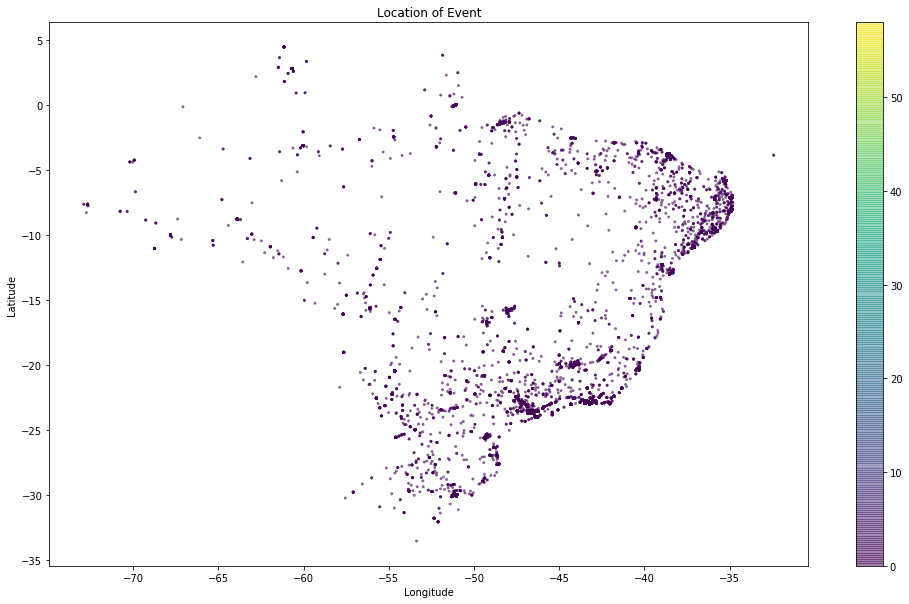

In [231]:
# Explore the exact location of events
plt.figure(figsize=(17, 10))

plt.scatter(x=data['longitude'], 
            y=data['latitude'],
            c=data['fatalities'],
            s=4, 
            alpha=0.50,
            cmap='viridis')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Event')
plt.colorbar();

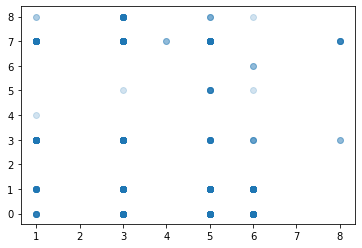

In [198]:
plt.scatter(x= data['inter1'], y=data['inter2'], alpha=.2);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!